In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   floors  waterfront  view  condition  ...  yr_built  yr_renovated  zipcode  \
0     1.0           0     0          3  ...      1955             0    98178   
1     2.0           0     0          3  ...      1951          1991    98125   
2     1.0           0     0          3  ...      1933             0    98028   
3     1.0           0     0          5  ...      1965             0    98136   
4     1.0           0     0          3  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  sqft_lot  sqft_above  \
0  47.5112 -122.257           1340        5650      5650        1180   
1  47.7210 -122.319           1690        7639      7242        2170   
2  47.7379 -122.233           2720        8062     10000         770   
3  47.5208 -122.393           1360        5000      5000        1050   
4  47.6168 -122.045           1800        7503      8080        1680   

   sqft_basement  
0              0  
1            400  
2              0  
3            910  
4              0  

[5 rows x 21 columns]

In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [5]:
df.drop(columns=['id', 'date'],inplace=True)

In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
 16  sqft_lot       21613 non-null  int64  
 17  sqft_above     21613 non-null  int64  
 18  sqft_b

In [8]:
df.describe()

price      bedrooms     bathrooms   sqft_living        floors  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   5.401822e+05      3.370842      2.114757   2079.899736      1.494309   
std    3.673622e+05      0.930062      0.770163    918.440897      0.539989   
min    7.500000e+04      0.000000      0.000000    290.000000      1.000000   
25%    3.219500e+05      3.000000      1.750000   1427.000000      1.000000   
50%    4.500000e+05      3.000000      2.250000   1910.000000      1.500000   
75%    6.450000e+05      4.000000      2.500000   2550.000000      2.000000   
max    7.700000e+06     33.000000      8.000000  13540.000000      3.500000   

         waterfront          view     condition         grade      yr_built  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1971.005136   
std        0.086517      0.766318      0.650743      1.175459     29.373411   
min        0.000000      0.000000      1.000000      1.000000   1900.000000   
25%        0.000000      0.000000      3.000000      7.000000   1951.000000   
50%        0.000000      0.000000      3.000000      7.000000   1975.000000   
75%        0.000000      0.000000      4.000000      8.000000   1997.000000   
max        1.000000      4.000000      5.000000     13.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean      84.402258  98077.939805     47.560053   -122.213896    1986.552492   
std      401.679240     53.505026      0.138564      0.140828     685.391304   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15      sqft_lot    sqft_above  sqft_basement  
count   21613.000000  2.161300e+04  21613.000000   21613.000000  
mean    12768.455652  1.510697e+04   1788.390691     291.509045  
std     27304.179631  4.142051e+04    828.090978     442.575043  
min       651.000000  5.200000e+02    290.000000       0.000000  
25%      5100.000000  5.040000e+03   1190.000000       0.000000  
50%      7620.000000  7.618000e+03   1560.000000       0.000000  
75%     10083.000000  1.068800e+04   2210.000000     560.000000  
max    871200.000000  1.651359e+06   9410.000000    4820.000000

In [9]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

In [12]:
df['waterfront'].replace(0,'No',inplace=True)
df['waterfront'].replace(1,'yes',inplace=True)

In [14]:
#df['waterfront'].replace({1:'yes',0:'No'})

0        No
1        No
2        No
3        No
4        No
         ..
21608    No
21609    No
21610    No
21611    No
21612    No
Name: waterfront, Length: 21613, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  object 
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
 16  sqft_lot       21613 non-null  int64  
 17  sqft_above     21613 non-null  int64  
 18  sqft_b

In [18]:
for col in df.select_dtypes('object'):
    print(col)
    print(df[col].unique())
    print("----------")

waterfront
['No' 'yes']
----------


In [19]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("----------")

price
[221900. 538000. 180000. ... 541800. 610685. 402101.]
----------
bedrooms
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
----------
bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
----------
sqft_living
[1180 2570  770 ... 3087 3118 1425]
----------
floors
[1.  2.  1.5 3.  2.5 3.5]
----------
waterfront
['No' 'yes']
----------
view
[0 3 4 2 1]
----------
condition
[3 5 4 1 2]
----------
grade
[ 7  6  8 11  9  5 10 12  4  3 13  1]
----------
yr_built
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 195

In [21]:
df[df.duplicated()]

price  bedrooms  bathrooms  sqft_living  floors waterfront  view  \
3951   550000.0         4       1.75         2410     2.0         No     3   
4352   259950.0         2       2.00         1070     2.0         No     0   
14983  585000.0         3       2.50         2290     2.0         No     0   
20054  555000.0         3       2.50         1940     2.0         No     0   
20524  529500.0         3       2.25         1410     3.0         No     0   

       condition  grade  yr_built  yr_renovated  zipcode      lat     long  \
3951           4      8      1936          1980    98074  47.6499 -122.088   
4352           3      9      2008             0    98106  47.5213 -122.357   
14983          3      9      2001             0    98006  47.5443 -122.172   
20054          3      8      2009             0    98027  47.5644 -122.093   
20524          3      9      2014             0    98116  47.5818 -122.402   

       sqft_living15  sqft_lot15  sqft_lot  sqft_above  sqft_basement  
3951            2520       14789      8447        2060            350  
4352            1070         928       649         720            350  
14983           2290        7984      5089        2290              0  
20054           1880        3078      3211        1940              0  
20524           1510        1352       905        1410              0

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df[df.duplicated()]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, sqft_lot, sqft_above, sqft_basement]
Index: []

In [27]:
df.groupby('grade')['price'].mean()

grade
1     1.420000e+05
3     2.056667e+05
4     2.143810e+05
5     2.485240e+05
6     3.019166e+05
7     4.025933e+05
8     5.428923e+05
9     7.741007e+05
10    1.072347e+06
11    1.497792e+06
12    2.192500e+06
13    3.710769e+06
Name: price, dtype: float64

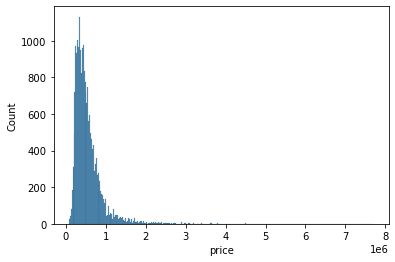

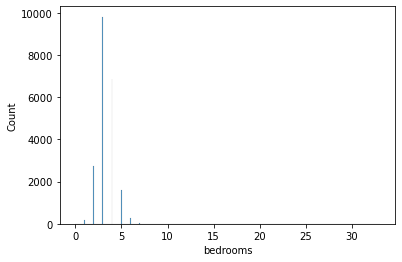

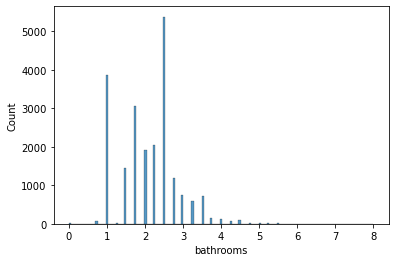

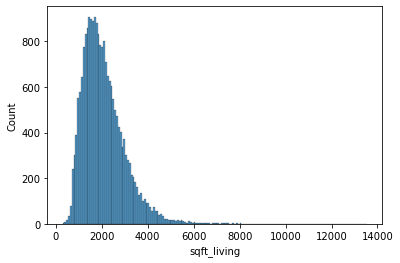

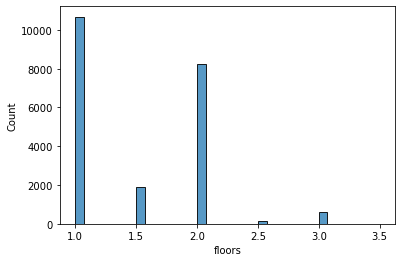

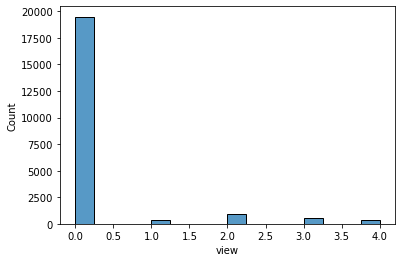

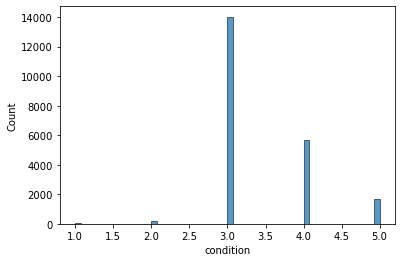

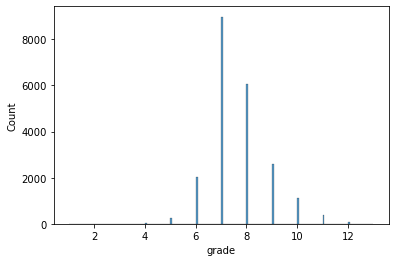

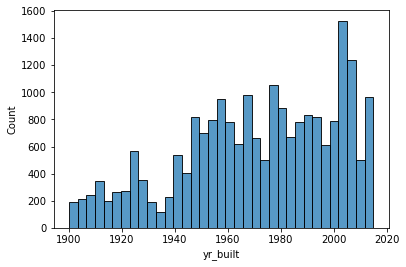

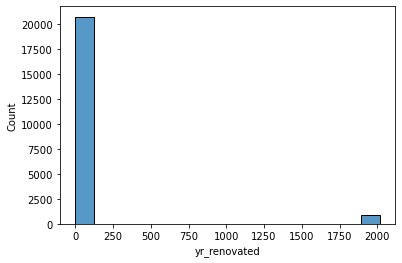

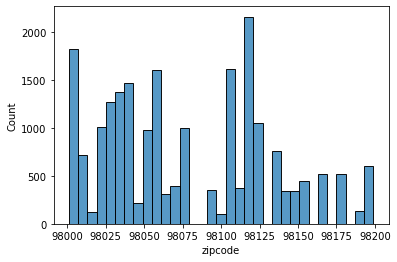

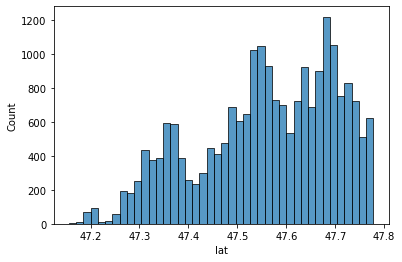

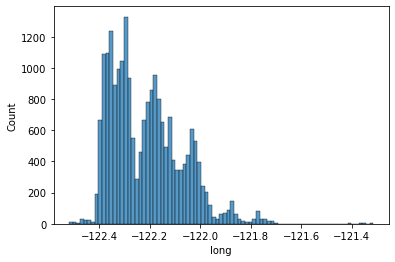

In [32]:
for col in df.select_dtypes('number'):
    sns.histplot(data=df,x=col)
    plt.show()

In [47]:
#px.histogram(df,x='price')
px.histogram(np.log(df['price']))


c:\Users\Emy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='waterfront', ylabel='count'>

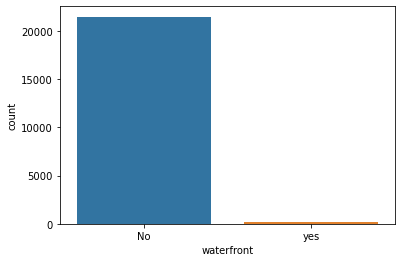

In [33]:
sns.countplot(df['waterfront'])

In [34]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above',
       'sqft_basement'],
      dtype='object')

In [43]:
sns.scatterplot(data=df,x='sqft_living',y='price',hue='waterfront')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

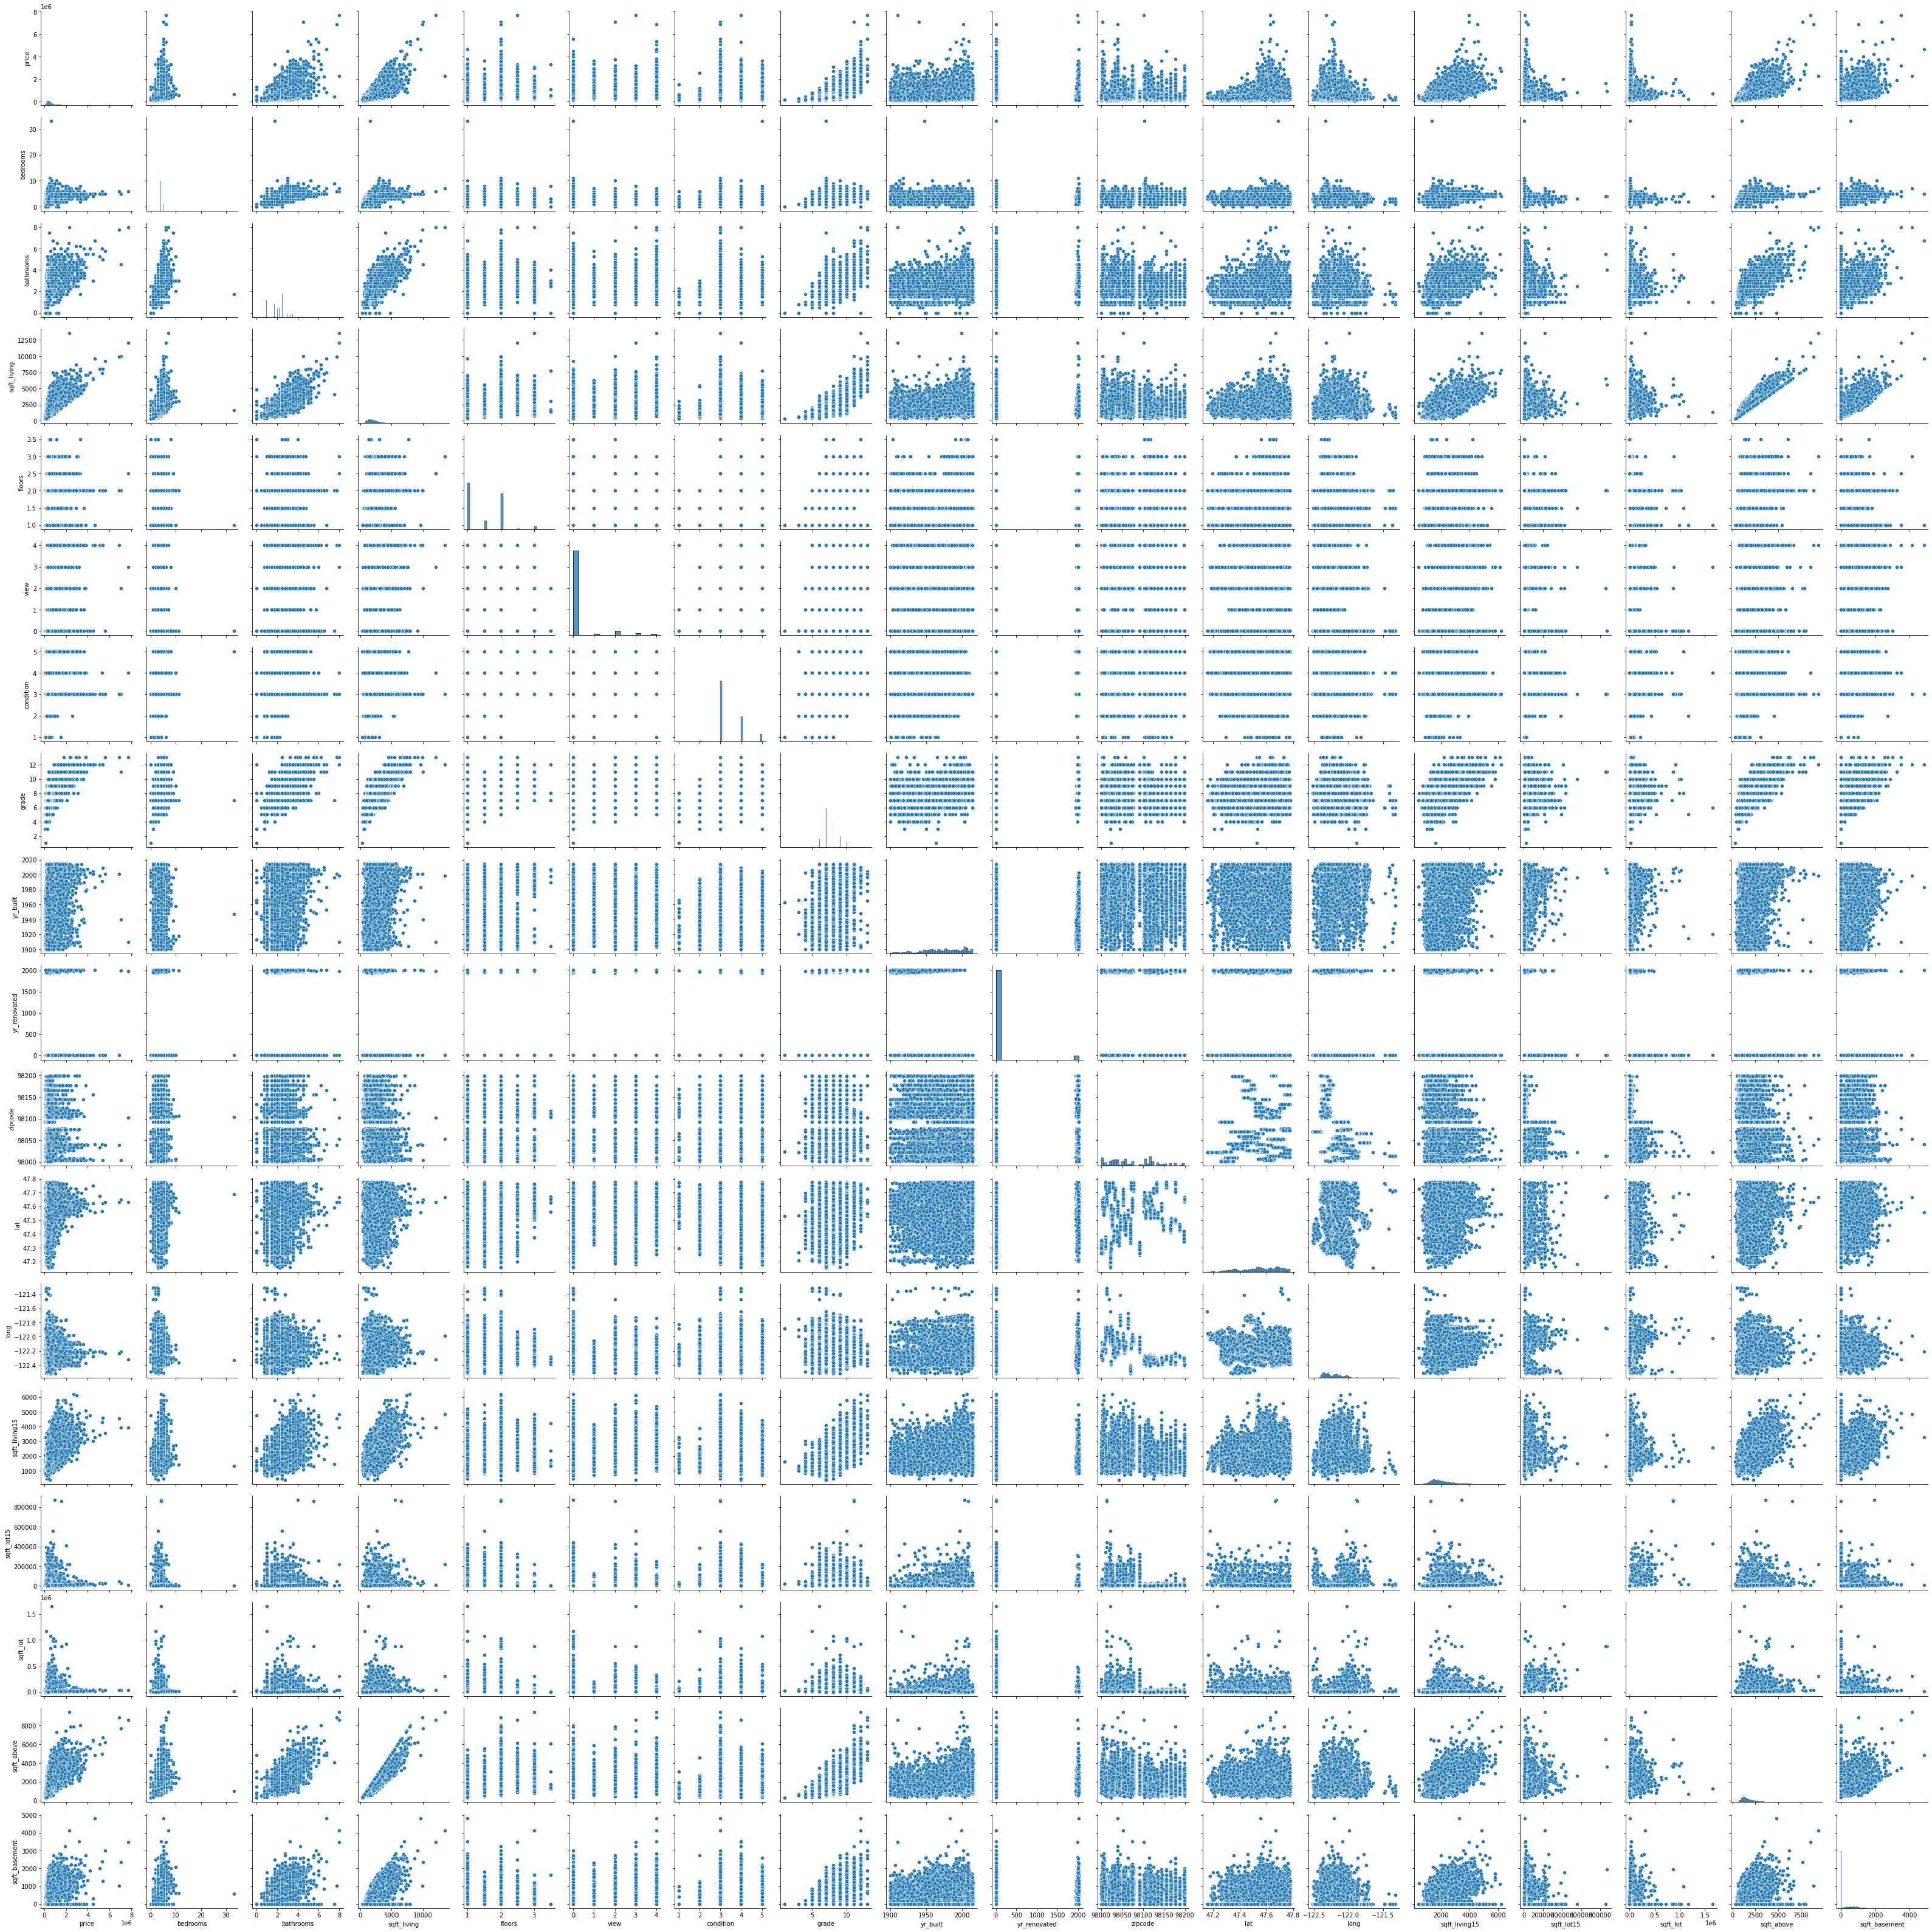

In [44]:
sns.pairplot(df)

<AxesSubplot:>

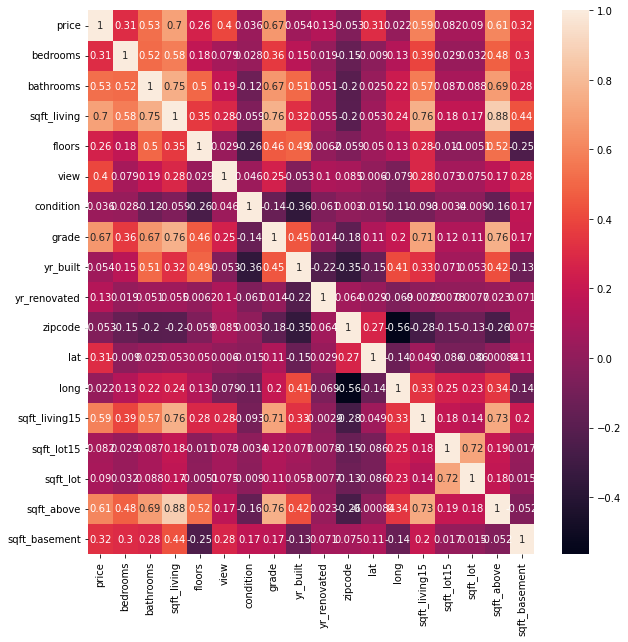

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.